# Three-dimensional kinematics dataset of running - interlaboratory comparison

> Reginaldo K Fukuchi, Marcos Duarte and Reed Ferber

## Setup

In [1]:
import sys, os, glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Configuration

In [2]:
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1})
sns.set_style('whitegrid')
pd.set_option('display.precision', 3)

colors = sns.color_palette()
display(colors)

# check if directory has the data
path2 = Path('./../data/')
metadata_fname = 'metadata.csv'
if not os.path.isfile(path2 / metadata_fname):
    path2 = Path('')
    if not os.path.isfile(path2 / metadata_fname):
        raise Exception(f'File {metadata_fname} not found.')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Load metadata

In [3]:
metadata = pd.read_csv(path2 / metadata_fname, index_col=0)
display(metadata)

,ID,Filename,Speed,Age,Height,Mass,Group
0,BMC01,BMC01angs.txt,2.500,22,181.0,62.00,BMC
1,BMC02,BMC02angs.txt,2.500,38,183.0,80.00,BMC
2,BMC03,BMC03angs.txt,2.500,34,177.0,65.40,BMC
3,BMC04,BMC04angs.txt,2.500,33,168.0,57.05,BMC
4,BMC05,BMC05angs.txt,2.500,32,169.0,60.00,BMC
5,BMC06,BMC06angs.txt,2.500,39,177.8,78.30,BMC
6,BMC07,BMC07angs.txt,2.500,31,182.9,66.70,BMC
7,BMC08,BMC08angs.txt,2.500,36,180.0,69.00,BMC
8,BMC09,BMC09angs.txt,2.500,51,173.2,63.15,BMC
9,BMC10,BMC10angs.txt,2.500,30,179.5,75.00,BMC


### Descriptive statistics for Age, Height, Mass, height per Group

In [4]:
cols = ['Group', 'Age', 'Height', 'Mass', 'Speed']
metadata[cols].groupby('Group').describe().stack().transpose()

Group    BMC                                                            RIC  \
       count     mean    std     min      25%    50%      75%     max count   
Age     23.0   34.957  6.161   22.00   31.500   35.0   38.000   51.00  23.0   
Height  23.0  176.913  6.685  162.70  172.500  178.6  181.900  187.20  23.0   
Mass    23.0   70.015  7.969   57.05   63.925   69.0   76.975   82.15  23.0   
Speed   23.0    2.500  0.000    2.50    2.500    2.5    2.500    2.50  23.0   

Group                                                               
           mean    std      min     25%      50%      75%      max  
Age      34.261  4.403   28.000   30.50   34.000   36.500   42.000  
Height  177.339  3.179  172.200  174.00  178.000  180.000  182.900  
Mass     78.365  7.349   62.900   74.80   78.400   83.650   91.700  
Speed     2.490  0.034    2.428    2.47    2.481    2.502    2.571

In [5]:
# reorder planes of angles
for fname in metadata['Filename']:
    print(fname[:5], end=' ')
    df = pd.read_csv(path2 / fname, header=0, sep='\t', index_col=0)
    if df.columns[0][4] == 'Z':
        print('Planes already reordered.')
        break
    order = [np.array([2, 0, 1, 5, 3, 4, 8, 6, 7])+9*i for i in range(int(df.shape[1]/9))]
    order = np.array(order).flatten()
    df = df.iloc[:, order]
    df.to_csv(path2 / fname, sep='\t', float_format=None, index=True)

BMC01 Planes already reordered.


In [6]:
# rename columns
joints = ['Hip', 'Knee', 'Ankle']
axes   = ['Z', 'X', 'Y']
planes = ['Sagittal', 'Frontal', 'Transverse']
for fname in metadata['Filename']:
    print(fname[:5], end=' ')
    df = pd.read_csv(path2 / fname, header=0, sep='\t', index_col=0)
    if df.columns[0] == 'Hip_Z_1':
        print('Columns already renamed.')
        break
    names = [f'{j}_{a}_{t}' for t in range(1, int(df.shape[1]/9)+1) for j in joints for a in axes]
    df.columns = names
    df.to_csv(path2 / fname, sep='\t', float_format=None, index=True)

BMC01 Columns already renamed.


## Ensemble time-series

In [7]:
joints = ['Hip', 'Knee', 'Ankle']
axes   = ['Z', 'X', 'Y']
planes = ['Sagittal', 'Frontal', 'Transverse']
labs   = metadata['ID'].str[:3].unique()

In [8]:
ang_m  = np.full([101, len(joints)*len(axes), len(labs)], np.nan)
ang_sd = np.full([101, len(joints)*len(axes), len(labs)], np.nan)
for l, lab in enumerate(labs):
    fnames = metadata[metadata['Group']==lab]['Filename']
    data = np.full([101, len(joints)*len(axes), len(fnames)], np.nan)
    for s, subject in enumerate(fnames):
        try:
            y = np.loadtxt(path2 / subject, skiprows=1)
            y = y[:, 1:]  # drop time column
        except:
            y = np.nan
            print(f'File {subject} not loaded.')
        ym = np.full([101, len(joints)*len(axes)], np.nan)
        if not np.all(np.isnan(y)):
            for j in range(len(joints)):
                for ax in range(len(axes)):
                    ym[:, 3*j+ax] = np.nanmedian(y[:, 3*j + ax:y.shape[1]-(3*j+ax+1):len(joints)*len(axes)], axis=1)
        data[:, :, s] = ym
    # Mean and std across subjects
    ang_m[:, :, l]  = np.nanmean(data, axis=2)
    ang_sd[:, :, l] = np.nanstd(data, axis=2, ddof=1)

## Plot of angles

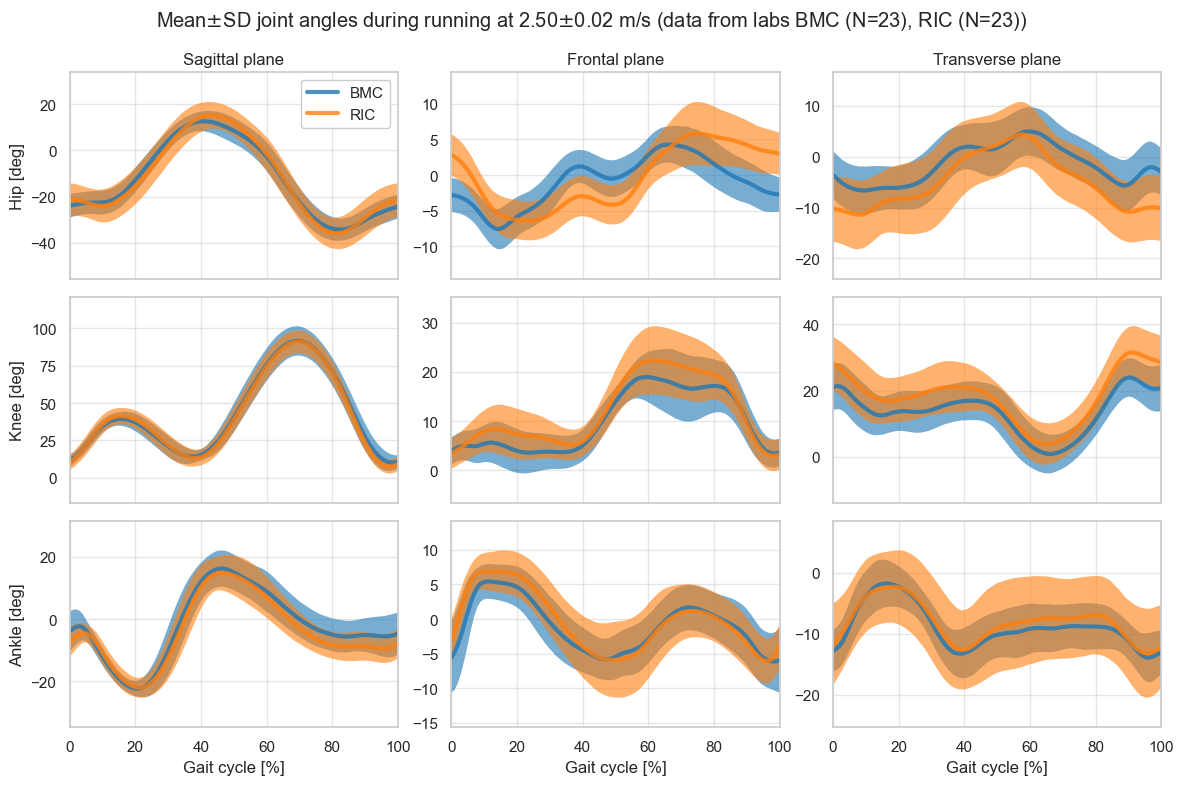

In [9]:
tn = np.linspace(0, 100, 101)

fig, axs = plt.subplots(3, 3, sharex=True, figsize=(12, 8))
v_m, v_sd = metadata.Speed.mean(), metadata.Speed.std()
labs_s = [f'{lab} (N={len(metadata[metadata["Group"]==lab]["Filename"])})' for lab in labs]
labs_s = ', '.join(labs_s)
fig.suptitle(f'Mean$\pm$SD joint angles during running at {v_m:,.2f}$\pm${v_sd:,.2f} m/s (data from labs {labs_s})')
for j, joint in enumerate(joints):
    for xyz, eixo in enumerate(axes):
        for l, lab in enumerate(labs):
            axs[j, xyz].plot(tn, ang_m[:, 3*j+xyz, l], label=labs[l], color=colors[l], alpha=.8, lw=3)
            axs[j, xyz].fill_between(tn,
                                     ang_m[:, 3*j+xyz, l] + ang_sd[:, 3*j+xyz, l],
                                     ang_m[:, 3*j+xyz, l] - ang_sd[:, 3*j+xyz, l],
                                     facecolor=colors[l], alpha=.6, edgecolor='none')

        axs[j, xyz].set_ylabel(joint + '-' + planes[xyz])
        axs[j, xyz].set_xlim([0, 100])
        axs[j, xyz].margins(y=0.2)
        axs[j, xyz].grid(alpha=.5)
        axs[j, xyz].xaxis.set_ticks_position('none')
        axs[j, xyz].yaxis.set_ticks_position('none') 
        if j == 0:
            axs[0, xyz].set_title(f'{planes[xyz]} plane')
        if j == 2:
            axs[j, xyz].set_xlabel('Gait cycle [%]')
        if xyz == 0:
            axs[j, xyz].set_ylabel(f'{joint} [deg]')
        else:
            axs[j, xyz].set_ylabel('')

fig.align_ylabels(axs[:, 0])
axs[0, 0].legend(loc='best', framealpha=1)
fig.tight_layout(w_pad=.1)
fig.savefig(path2 / 'labs_angs.png', bbox_inches='tight')
plt.show()